In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.dates import DateFormatter
from collections import Counter
import seaborn as sns

sns.set_theme()
sns.set_context("paper")
sns.set_palette("colorblind")

colors = sns.color_palette("colorblind")


In [2]:
# Loading in SOPHIE Data
ept80df = pd.read_csv("Data/SOPHIE_EPT80_1990-2022.csv", low_memory=False)
ept80df['Date_UTC'] = pd.to_datetime(ept80df['Date_UTC'])
ept80df = ept80df[ept80df['Date_UTC'].between('1996','2021')].reset_index(drop=True)
ept80df['Delbay'] = pd.to_numeric(ept80df['Delbay'],errors='coerce')

array = np.zeros(len(ept80df['Date_UTC']),dtype=int)
for i, __ in ept80df.iloc[1:-1].iterrows():
    if (ept80df.iloc[i-1]['Phase']==1) and (ept80df.iloc[i]['Phase']==2) and (ept80df.iloc[i]['Flag']==0) and (ept80df.iloc[i+1]['Phase']==3):
        array[i] = 1
        continue
    if (ept80df.iloc[i-1]['Phase']==3) and (ept80df.iloc[i-1]['Flag']==0) and (ept80df.iloc[i]['Phase'] == 2) and (ept80df.iloc[i]['Flag']==0) and (ept80df.iloc[i+1]['Phase'] == 3):
        array[i] = 2
        continue
    else:
        array[i] = 0
        continue
ept80df['Type'] = array

# Loading in Particle Injections
particleinjections = pd.read_csv("Data/BYparticleinjections.csv")
particleinjections['Date_UTC'] = pd.to_datetime(particleinjections['Date_UTC'])

(0.0, 10.0)

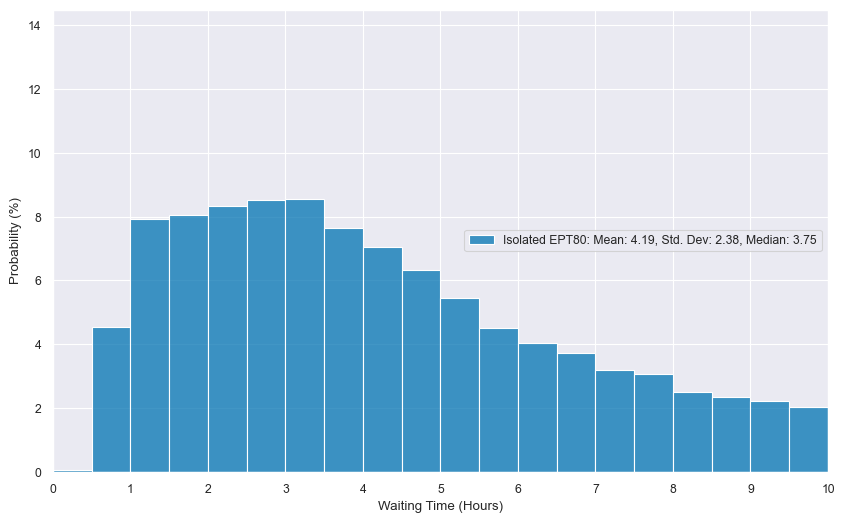

In [3]:
Isolated_Onsets = ept80df[ept80df['Type']==1]
Isolated_wt = np.diff(Isolated_Onsets['Date_UTC'])/pd.to_timedelta('1h')
Isolated_wt_10 = Isolated_wt[Isolated_wt<10]
fig, axes = plt.subplots(figsize=(10,6))

sns.histplot(Isolated_wt_10, bins=np.arange(0,10.25,0.5), ax=axes, stat='percent', label='Isolated EPT80: Mean: {:.2f}, Std. Dev: {:.2f}, Median: {:.2f}'.format(np.nanmean(Isolated_wt_10),np.nanstd(Isolated_wt_10),np.nanmedian(Isolated_wt_10)))
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
axes.set_ylim(0,14.5)
axes.legend(loc='center right')
axes.set_xlabel('Waiting Time (Hours)')
axes.set_ylabel('Probability (%)')
axes.set_xlim(0,10)


(0.0, 10.0)

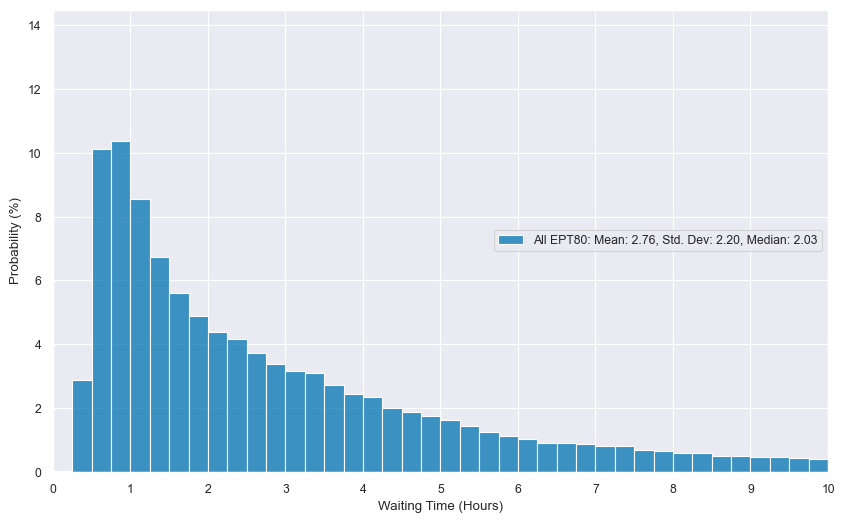

In [4]:
allonsets = ept80df.iloc[np.intersect1d(np.where(ept80df['Phase']==2),np.where(ept80df['Flag']==0))]
allonsets_wt = np.diff(allonsets['Date_UTC'])/pd.to_timedelta('1h')
allonsets_wt_10 = allonsets_wt[allonsets_wt<10]
fig, axes = plt.subplots(figsize=(10,6))

sns.histplot(allonsets_wt_10, bins=np.arange(0,10.25,0.25), ax=axes, stat='percent', label='All EPT80: Mean: {:.2f}, Std. Dev: {:.2f}, Median: {:.2f}'.format(np.nanmean(allonsets_wt_10),np.nanstd(allonsets_wt_10),np.nanmedian(allonsets_wt_10)))
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
axes.set_ylim(0,14.5)
axes.legend(loc='center right')
axes.set_xlabel('Waiting Time (Hours)')
axes.set_ylabel('Probability (%)')
axes.set_xlim(0,10)